Messing around with different ways to work around the complex number issue I kept running into with FrequencyEvolution. I tried using the absolute value, and the real part, and just casting to a complex number and praying it worked out, and none of them gave me a continuous curve as I expected/wanted. I still kept running into the same issue. This problem was not solved.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
from enterprise import constants as const
from matplotlib.colors import LinearSegmentedColormap as linSegColor

In [2]:
def changeInFreq(mass, freq, yrs):
    seconds = yrs * 3.154 * (10 ** 7) # convert the years to seconds
    M = mass * 5 * (10 ** -6) # find mass expressed in seconds, rather than solar masses
    inside = ( (1 - (256/5) * (M ** (5/3)) * ( (np.pi * freq) ** (8/3)) * seconds) )
    print(str(yrs * const.c * const.yr / const.kpc) + ": " + str(inside))
    if(inside > 0):
        val = inside ** (-3/8) #fine
    else: #extremely not fine
        #val = np.abs(complex(inside) ** (-3/8)) #looks like a delta function
        #val = (complex(inside) ** (-3/8)).real #looks like a delta function but lower on the right side
        #val = -(complex(inside) ** (-3/8)).real #looks like the above, but right side is flipped (duh)
        val = inside ** (-3/8) #gives nan
    #val = inside ** (-3/8)
    print(val)
    return (freq * val) - freq

In [3]:
print(-0.010723156254752508 ** (-3/8))
print(complex(-0.010723156254752508) ** (-3/8))
print(np.abs( (complex(-0.010723156254752508) ** (-3/8))))
print(( complex(-0.010723156254752508) ** (-3/8)).real)

-5.478088095883388
(2.0963735553309943-5.061093469080389j)
5.478088095883388
2.0963735553309943


In [4]:
class Pulsar:
    def __init__(self, line):
        line = line.split()
        
        self.name = line[0]
        
        temp = line[1].split('+')
        self.meanDistance = float(temp[0])
        temporary = temp[1].split('-')
        self.plusError = float(temporary[0])
        self.minusError = float(temporary[1])
        
        self.rAsc = line[2]
        dividedUp = self.rAsc.split(':')
        hours = float(dividedUp[0])
        minutes = float(dividedUp[1])
        seconds = float(dividedUp[2])
        hours += (minutes / 60) + (seconds / 3600)
        self.phi = np.pi * hours / 12 #THIS IS IN RADIANS; DO WE WANT IT IN RADIANS?
        
        self.dec = line[3]
        divvyUp = self.dec.split(':')
        sign = divvyUp[0][0:1]
        divvyUp[0] = divvyUp[0][1:]
        degrees = float(divvyUp[0])
        minutes = float(divvyUp[1])
        seconds = float(divvyUp[2])
        degrees += (minutes / 60) + (seconds / 3600)
        if (sign.endswith('+')):
            self.theta = (np.pi/2) - (np.pi * degrees / 180)
        else:
            self.theta = (np.pi/2) + (np.pi * degrees / 180)
            
        self.pos = [np.sin(self.phi) * np.cos(self.theta), np.sin(self.phi) * np.sin(self.theta), np.cos(self.phi)]
        
    #can't do multiple constructors? evil evil evil
    
    def __str__(self):
        return str(self.name) + ", located at " + str(self.rAsc) + " " + str(self.dec)+": " + str(self.meanDistance) + "+" + str(self.plusError) + "-" + str(self.minusError) + " kpc"
    
    

0.10999999999999999: 0.8206781496967375
1.076924292342301
0.156: 0.7456890122971913
1.1163255018247882
0.3400000000000001: 0.4457324626990067
1.3539329284255581
0.39000000000000007: 0.3642225307429783
1.4604525358133573
0.4: 0.34792054435177266
1.4857473769474903
0.4: 0.34792054435177266
1.4857473769474903
0.4099999999999999: 0.33161855796056705
1.5127265875387168
0.49999999999999994: 0.18490068043971575
1.8832069964473401
0.6: 0.02188081652765883
4.192529993936678
0.6: 0.02188081652765883
4.192529993936678
0.62: -0.010723156254752508
nan
0.69: -0.12483706099319192
nan
0.7: -0.14113904738439786
nan
0.7: -0.14113904738439786
nan
0.7200000000000002: -0.17374302016680931
nan
0.8: -0.30415891129645467
nan
0.8: -0.30415891129645467
nan
0.8: -0.30415891129645467
nan
0.9: -0.4671787752085115
nan
0.9: -0.4671787752085115
nan
0.9999999999999999: -0.6301986391205685
nan
0.9999999999999999: -0.6301986391205685
nan
1.03: -0.6791045982941852
nan
1.1: -0.7932185030326253
nan
1.1: -0.7932185030326253

/tmp/ipykernel_6780/2410763707.py:12: RuntimeWarning: invalid value encountered in scalar power
  val = inside ** (-3/8) #gives nan


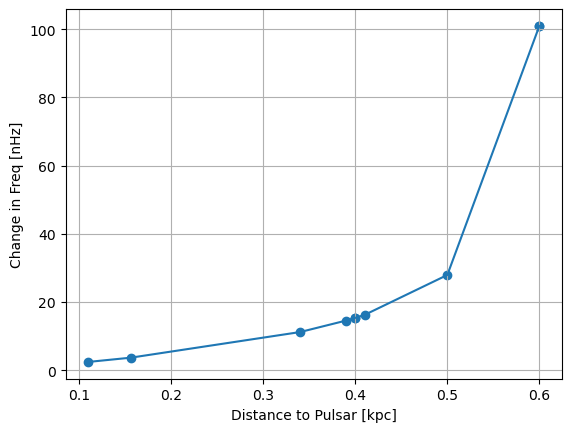

In [5]:
baseM = 10 ** 9 #solar masses
baseFreq = 10 ** -7.5 #in hertz
#doesn't currently work for higher frequencies, some sort of complex number issue

f = open("pulsarDistPM.txt")
pulsars = []
for x in range(65):
    pulsars.append(Pulsar(f.readline()))
    
distances = np.array([])
for x in range(65):
    distances = np.append(distances, pulsars[x].meanDistance)

times = distances * const.kpc / const.c / const.yr
times = np.sort(times)
distances = np.sort(distances)

changes = []
for x in range(65):
    changes.append(changeInFreq(baseM, baseFreq, times[x]) * (10 ** 9))

truncatedChanges = np.delete(changes, [57, 58, 59, 60, 61, 62, 63, 64])
truncatedDistances = np.delete(distances, [57, 58, 59, 60, 61, 62, 63, 64])
    
plt.scatter(distances, changes)
#plt.scatter(truncatedDistances, truncatedChanges)
plt.plot(distances, changes)
plt.xlabel("Distance to Pulsar [kpc]")
plt.ylabel("Change in Freq [nHz]")
plt.grid()